# Case study: HALO_Methods



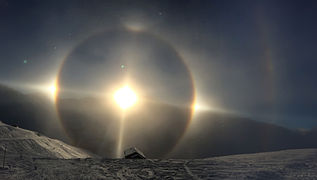

# intro

A Halo is typically perceived as a bright, sometimes colored ring around the sun. It is formed by ice crystals in the atmosphere and their shape, size and roughness determine the observed display. In my wife's thesis (https://edoc.ub.uni-muenchen.de/21811/) she uses a self-built suntracking camera to infer ice particle propetries from recorded images of halo displays. 

For this notebook, the image processing and feature engineering is already done, the input is a table of features extracted from halo images. I employ different machine learning methods to find out which method yields the best results for classification of images into catgories "halo" and "no halo". 

I realize there is the scipy method GridSearchCV that does most of the work for you, but herein i choose to do it per hand for practise purposes. 

# imports

In [61]:
#data input
import yaml

#data analysis
import numpy as np

#machine learning toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#plotting
import matplotlib.pylab as plt


# prepare data

In [62]:
#load data

with open('HaloCam_training_data_yaml\halo_features_dict_rgb_segmentId3_add.yaml') as file:
    data = yaml.load(file, Loader=yaml.Loader)

print(data)


{'labels': array([1., 1., 1., ..., 0., 0., 0.]), 'values': array([[  1.02382862,  20.80037935,  22.00116938, ...,  11.75834748,
         -3.01246421, 182.07926075],
       [  1.04331953,  20.70077405,  21.60070549, ...,   7.70293846,
         -3.85167719, 181.10992076],
       [  1.1131615 ,  19.3992797 ,  21.80123422, ...,   3.20414537,
         -2.70203875, 198.68700057],
       ...,
       [  1.3914546 ,  18.59886227,  22.59945274, ...,  15.22695755,
          2.22727684, 120.50248917],
       [  1.14496692,  18.00118862,  23.40059213, ...,  16.10111662,
          3.28118988,  84.80006937],
       [  1.21937536,  18.00118862,  21.49994507, ...,  16.42764882,
          2.77848534,  89.68094816]])}


In [63]:
#filter data

features = data["values"]
classes = data["labels"]

Some models require the input data to be normalized.

In [64]:
#using sklearn StandardScaler

scaler = StandardScaler()
scaler.fit(features)
features_norm = scaler.transform(features)
print(features_norm)

[[-0.28887422  0.59310073  0.38469758 ...  0.40167071 -0.38976464
   0.45623557]
 [-0.0660705   0.50285715 -0.11628506 ... -0.2098794  -0.79369266
   0.43921185]
 [ 0.73230395 -0.67631214  0.13457754 ... -0.88829123 -0.24035138
   0.74790368]
 ...
 [ 3.91351608 -1.40149981  1.13315354 ...  0.92473236  2.13221523
  -0.62518674]
 [ 1.0958767  -1.94299922  2.13538356 ...  1.05655434  2.63948218
  -1.25219904]
 [ 1.94645134 -1.94299922 -0.24233693 ...  1.10579495  2.39752161
  -1.16648017]]


In the following I'll be using a single train-test-split as well as K-Fold cross validation. So I'll reating a single train/test split, setting aside 75% for training, and 25% for testing.

In [65]:
#define train-test-slpit

X_train, X_test, y_train, y_test = train_test_split(features_norm, classes, test_size=0.25, random_state=42)

## Decision Trees

In [66]:
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

Display the resulting decision tree.

69


[Text(167.4, 190.26, 'X[5] <= 0.253\ngini = 0.313\nsamples = 4852\nvalue = [3909, 943]'),
 Text(83.7, 135.9, 'X[4] <= 0.11\ngini = 0.064\nsamples = 3910\nvalue = [3780, 130]'),
 Text(41.85, 81.53999999999999, 'X[3] <= -0.201\ngini = 0.015\nsamples = 3330\nvalue = [3304, 26]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 0.486\ngini = 0.294\nsamples = 580\nvalue = [476, 104]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[7] <= 0.633\ngini = 0.236\nsamples = 942\nvalue = [129, 813]'),
 Text(209.25, 81.53999999999999, 'X[6] <= 0.402\ngini = 0.129\nsamples = 869\nvalue = [60, 809]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[6] <= -0.88\ngini = 0.104\nsamples =

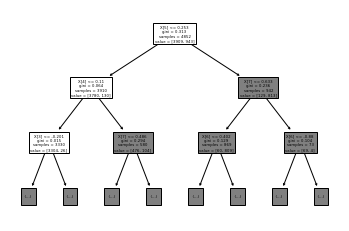

In [67]:
print(clf.get_n_leaves())
plot_tree(clf, max_depth=2)

Measuring the model's accuracy using train-test-split:

In [68]:
def get_acc(pred, data):
    acc = (np.sum(data == pred) / len(data))
    return acc
    
pred_test = clf.predict(X_test)
print(get_acc(pred_test, y_test))

0.9783683559950557


To check for Overfitting I compare the accuracy for train and test dataset:

In [69]:
pred_train = clf.predict(X_train)
print(get_acc(pred_train, y_train))

1.0


The accuracy on the training dataset is significantly higher than on the test data. This means I'm overfitting. 
I will run again and tune the parameter max_depth:


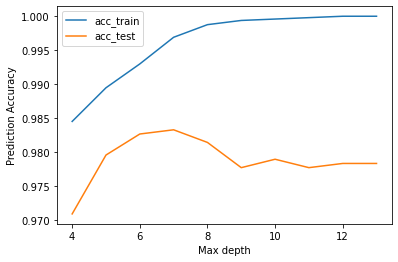

acc_train: [0.9845424567188789, 0.9894888705688376, 0.9929925803792251, 0.9969084913437758, 0.9987633965375103, 0.9993816982687551, 0.9995877988458368, 0.9997938994229184, 1.0, 1.0]
acc_test: [0.9709517923362175, 0.9796044499381953, 0.9826946847960445, 0.9833127317676144, 0.9814585908529048, 0.9777503090234858, 0.9789864029666254, 0.9777503090234858, 0.9783683559950557, 0.9783683559950557]


In [70]:
#cycle trough parameter range

range_min, range_max, range_increment = 4, 14, 1
param_range = np.arange(range_min, range_max, range_increment)

acc_train, acc_test = [],[]
for i in param_range:
    clf = DecisionTreeClassifier(random_state=10, max_depth=i)
    clf.fit(X_train, y_train)
    # predict test data
    pred_test = clf.predict(X_test)
    acc_test.append(get_acc(pred_test, y_test))
    # predict training data
    pred_train = clf.predict(X_train)
    acc_train.append(get_acc(pred_train, y_train))

#plot results
plt.plot(param_range, acc_train, label='acc_train')
plt.plot(param_range, acc_test, label='acc_test')
plt.xlabel('Max depth')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.show()
print('acc_train:', acc_train)
print('acc_test:', acc_test)

We get a clear Optimum for a max_depth=7, where the the accuracy on the test data is maximal while we are still well below 1 for the training dataset. 

To get a single measure of the model's accuracy for several different Test-Datasets, I use K-Fold Cross-Validation (K=10) instead of a single Train-Test-Split. For simplicity, I will subsequently compare other algorithms using this metric.

In [71]:
# run Decision Tree Classifier on full Dataset

clf_tree = DecisionTreeClassifier(random_state=10, max_depth=7)
clf_tree.fit(features, classes)

#Print Cross-Validation Score and its Mean

def CV_and_Mean(classifier, X, y, cv):
    CVS = cross_val_score(classifier, X, y, cv=cv)
    return CVS, 'Mean Value: ', np.mean(CVS)
  
    
# print CV-Score and Mean for Decision Tree    
acc_dec_tree = CV_and_Mean(clf_tree, features_norm, classes, 10) 
print(acc_dec_tree)
acc_tree_mean = acc_dec_tree[2]

(array([0.98299845, 0.98763524, 0.98299845, 0.98763524, 0.97063369,
       0.98918083, 0.98918083, 0.97372488, 0.97836167, 0.98918083]), 'Mean Value: ', 0.9831530139103556)


# Random Forest
Now I try a RandomForestClassifier instead. Out of the box, it does perform slightly better:

In [72]:
clf_forest = RandomForestClassifier(random_state=10)
#clf_forest.fit(X_train, y_train)

acc_forest = CV_and_Mean(clf_forest, features_norm, classes, 10) 
print(acc_forest)
acc_forest_mean = acc_forest[2]

(array([0.98763524, 0.99690881, 0.99227202, 0.99690881, 0.98145286,
       0.99690881, 0.99227202, 0.98608964, 0.99072643, 0.99536321]), 'Mean Value: ', 0.9916537867078825)


## SVM

Next try using Support Vector Machines - obviously hyperparameters could be tuned here to get a better result.

In [73]:
clf_SVM_rbf = svm.SVC(random_state=1, tol=0.02, kernel='rbf')
clf_SVM_rbf.fit(features, classes)

acc_SVM_rbf = CV_and_Mean(clf_SVM_rbf, features_norm, classes, 10) 
print(acc_SVM_rbf)

acc_SVM_mean = acc_SVM_rbf[2]

(array([0.98299845, 0.99690881, 0.99072643, 0.99536321, 0.97372488,
       0.99227202, 0.99536321, 0.98454405, 0.98918083, 0.99536321]), 'Mean Value: ', 0.9896445131375581)


## KNN
For K-Nearest-Neighbors I tune the hyperparameter K:

In [74]:
#run KNN for several different K

acc=[]
for KK in range(1, 51):
    Kneigh = KNeighborsClassifier(n_neighbors=KK)
    acc.append(np.mean(cross_val_score(Kneigh, features_norm, classes, cv=10)))

acc_KNN_max = np.max(acc)

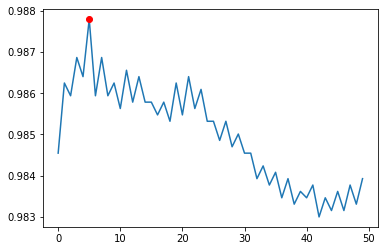

The maximum accuracy 0.988 is reached at at K = 5


In [75]:
plt.plot(acc)   
plt.plot(np.argmax(acc), np.max(acc), 'ro')
plt.show()

print('The maximum accuracy', np.round_(np.max(acc), decimals=3), 'is reached at at K =', np.argmax(acc))


## Naive Bayes

Finally, I try naive_bayes.MultinomialNB. I used MinMaxScaler to scale my features in the range MultinomialNB requires.

In [76]:
scaler = MinMaxScaler()
features_sc = scaler.fit_transform(features)

clf_NB = MultinomialNB()

In [77]:
acc_NB = CV_and_Mean(clf_NB, features_sc, classes, 10) 
print(acc_NB)
acc_NB_mean = acc_NB[2]

(array([0.80061824, 0.80061824, 0.80061824, 0.80061824, 0.80061824,
       0.80061824, 0.80061824, 0.80061824, 0.80061824, 0.80216383]), 'Mean Value: ', 0.8007727975270479)


## Compare Methods
Lets compare the above methods by their accuracies (this is not entirely fair, obviously I applied parameter tuning only for some methods):

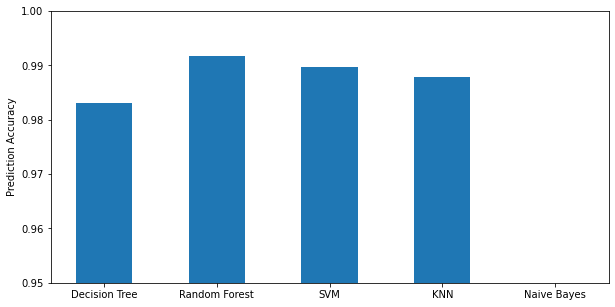

{'Decision Tree': 0.9831530139103556, 'Random Forest': 0.9916537867078825, 'SVM': 0.9896445131375581, 'KNN': 0.987789799072643, 'Naive Bayes': 0.8007727975270479}


In [78]:
all_accs = {"Decision Tree": acc_tree_mean, "Random Forest": acc_forest_mean, "SVM": acc_SVM_mean, "KNN": acc_KNN_max, "Naive Bayes": acc_NB_mean}
keys, values = all_accs.keys(), all_accs.values()

plt.figure(figsize=(10,5))
plt.bar(keys, values, width=0.5)
plt.ylabel('Prediction Accuracy')
plt.ylim(0.95, 1)
plt.show()

print(all_accs)

In this example, the random forest classifier outperforms the other classifiers. Unsurpirsingly, this is what Linda used for her thesis. 